# Ejemplo de t-SNE con MNIST

In [1]:
# Importamos librerias basicas

from __future__ import print_function, division
from builtins import range, input

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from sklearn.utils import shuffle

In [2]:
# Funcion que carga datos de MNIST
def getKaggleMNIST():
    # MNIST data:
    # columna 0 etiqueta de clase
    # columnas 1-785 datos con valores de 0 .. 255
    # tamaño del CSV: (42000, 1, 28, 28)
    train = pd.read_csv('/home/jorge/data/MNIST/train.csv').as_matrix().astype(np.float32)
    train = shuffle(train)

    Xtrain = train[:-1000,1:] / 255
    Ytrain = train[:-1000,0].astype(np.int32)

    Xtest  = train[-1000:,1:] / 255
    Ytest  = train[-1000:,0].astype(np.int32)
    return Xtrain, Ytrain, Xtest, Ytest

In [4]:
Xtrain, Ytrain, _, _ = getKaggleMNIST()

# No necesitamos los de Test. En Ytrain nos deja la etiqueta.

sample_size = 1000  # Ojo, si ponemos muchos podemos quedarnos sin RAM
X = Xtrain[:sample_size]
Y = Ytrain[:sample_size]

In [6]:
X[1].shape

(784,)

In [8]:
Y[1]

5

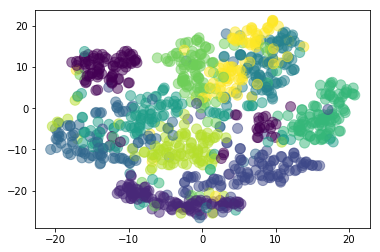

In [9]:
# Aplicamos t-SNE al conjunto de datos (1000) y deberia separarlos en 10 categorias.
tsne = TSNE()
Z = tsne.fit_transform(X)
plt.scatter(Z[:,0], Z[:,1], s=100, c=Y, alpha=0.5)
plt.show()

Se ve que ha separado los datos en varias categorias (deberian ser 10).
Separa mejor que el PCA y ademas es completamente NO Supervisado.....!!